<a href="https://colab.research.google.com/github/vinodthadi29/nlp-sentiment-analysis/blob/main/Sentiment_Analysis_of_Restaurant_Reviews_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

In [ ]:
df = pd.read_csv('/content/Restaurant_Reviews.tsv', delimiter='\t')

In [ ]:
df.info

<bound method DataFrame.info of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

In [ ]:
df.shape

(1000, 2)

In [ ]:
df.columns

Index(['Review', 'Liked'], dtype='object')

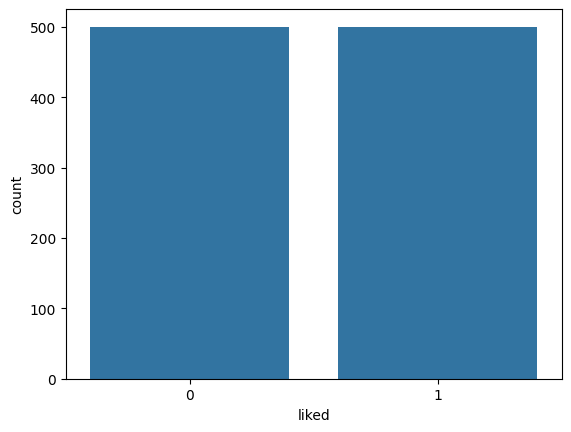

In [ ]:

df.columns = [x.lower() for x in df.columns]
sns.countplot(x='liked', data=df)
plt.show()

In [ ]:
X = df['review']
y = df['liked']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,review
29,The worst was the salmon sashimi.
535,An excellent new restaurant by an experienced ...
695,Went for lunch - service was slow.
557,I think this restaurant suffers from not tryin...
836,Just had lunch here and had a great experience.
...,...
106,"The food was delicious, our bartender was atte..."
270,The Veggitarian platter is out of this world!
860,"This place is pretty good, nice little vibe in..."
435,It was a huge awkward 1.5lb piece of cow that ...


In [ ]:
X_test

,review
521,If you haven't gone here GO NOW!
737,Try them in the airport to experience some tas...
740,The restaurant is very clean and has a family ...
660,"I personally love the hummus, pita, baklava, f..."
411,"Come hungry, leave happy and stuffed!"
...,...
408,Service was fantastic.
332,"We had fantastic service, and were pleased by ..."
208,Must have been an off night at this place.
613,"Sorry, I will not be getting food from here an..."


In [ ]:
y_train

,liked
29,0
535,1
695,0
557,0
836,1
...,...
106,1
270,1
860,1
435,0


In [ ]:
y_test

,liked
521,1
737,1
740,1
660,1
411,1
...,...
408,1
332,1
208,0
613,0


In [ ]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
X_train

<800x1794 sparse matrix of type '<class 'numpy.int64'>'
	with 7863 stored elements in Compressed Sparse Row format>

In [ ]:
X_test

<200x1794 sparse matrix of type '<class 'numpy.int64'>'
	with 1663 stored elements in Compressed Sparse Row format>

In [ ]:
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred_svc = svc_model.predict(X_test)
y_pred_nb = nb_model.predict(X_test)

In [ ]:
y_pred_svc

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1])

In [ ]:
y_pred_nb

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1])

In [ ]:
accuracy_svc = accuracy_score(y_test, y_pred_svc)
confusion_matrix_svc = confusion_matrix(y_test, y_pred_svc)
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80        96
           1       0.84      0.73      0.78       104

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.80      0.79      0.79       200



In [ ]:
svc_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('svc', SVC(kernel='linear'))
])

nb_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svc_pipeline.fit(X_train, y_train)
y_pred = svc_pipeline.predict(X_test)

In [ ]:
y_pred

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
nb_pipeline.fit(X_train, y_train)
y_pred = nb_pipeline.predict(X_test)

In [ ]:
y_pred

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1])

In [ ]:
best_model = nb_pipeline
joblib.dump(best_model, 'sentiment_model.pkl')

['sentiment_model.pkl']

In [ ]:
loaded_model = joblib.load('sentiment_model.pkl')

In [ ]:
if isinstance(y, pd.Series):
    y = y.to_numpy()
loaded_model.fit(X, y)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [ ]:

new_review = "The food was delicious and the service was excellent!"
prediction = loaded_model.predict([new_review])
print("prediction:", prediction)

prediction: [1]


In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.3 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import joblib

# Load the saved model
loaded_model = joblib.load('sentiment_model.pkl')

# --- Page Configuration ---
st.set_page_config(
    page_title="Restaurant Review Sentiment Analyzer",
    page_icon="🍔",  # You can use emojis for icons
    layout="wide",  # Use wide layout for better content arrangement
    initial_sidebar_state="expanded"  # Sidebar starts expanded
)

# --- Custom CSS for Styling ---
st.markdown(
    """
    <style>
    body {
        background-color: #f4f4f4; /* Light background color */
    }
    .stApp {
        padding: 2rem; /* Add padding around the content */
    }
    .stButton>button {
        background-color: #4CAF50; /* Green button color */
        color: white;
        border: none;
        padding: 0.8rem 1.5rem;
        border-radius: 5px;
        cursor: pointer;
    }
    </style>
    """,
    unsafe_allow_html=True,
)

# --- App Content ---
st.title('Restaurant Review Sentiment Analyzer')
st.write("Enter your restaurant review below and let our AI analyze the sentiment!")

review_input = st.text_area("Enter your restaurant review:", height=150)

if st.button("Analyze"):
    if review_input:
        prediction = loaded_model.predict([review_input])
        if prediction[0] == 1:
            st.success("This is a **positive** review! 😊 We appreciate your kind words.")
        else:
            st.error("This is a **negative** review. 😔 We're sorry to hear about your experience. We'll strive to do better.")
    else:
        st.warning("Please enter a review to analyze.")

# --- Restaurant Recommendations ---
st.header("Restaurant Recommendations")
if prediction[0] == 1:
    st.write("Based on your positive feedback, here are some similar restaurants you might enjoy:")
    # Add recommendation logic here
else:
    st.write("We understand your disappointment. Here are some alternative restaurants you could try:")
    # Add alternative recommendation logic here

# --- Footer ---
st.markdown("---")
st.markdown("**Contact us:** vinodthadi29@gmail.com | 9502738939")

Overwriting app.py


In [ ]:
!npm install -g localtunnel


added 22 packages, and audited 23 packages in 2s

3 packages are looking for funding
  run `npm fund` for details

1 moderate severity vulnerability

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.


In [ ]:
!wget -q -O- ipv4.icanhazip.com

35.229.238.247


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.229.238.247:8501

your url is: https://angry-boats-sell.loca.lt
2024-11-19 12:17:19.414 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/exec_code.py", line 88, in exec_func_with_error_handling
    result = func()
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 579, in code_to_exec
    exec(code, module.__dict__)
  File "/content/app.py", line 56, in <module>
    if prediction[0] == 1:
NameError: name 'prediction' is not defined
2024-11-19 12:17:27.736 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/exec_code.py", line 88, in exec_func_with_error_handling
    result = func()
  File "/usr/local/lib/pyth